In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from scipy.optimize import minimize

import warnings
warnings.filterwarnings('ignore') # suppress warnings

In [3]:
df = pd.read_csv('adjprice.csv') 

In [4]:
df.head(10)

,Date,0111145D US Equity,0202445Q US Equity,0203524D US Equity,0226226D US Equity,0376152D US Equity,0440296D US Equity,0544749D US Equity,0574018D US Equity,0598884D US Equity,...,YNR US Equity,YRCW US Equity,YUM US Equity,YUMC US Equity,ZBH US Equity,ZETHQ US Equity,ZION US Equity,ZRN US Equity,ZTS US Equity,ZTS-W US Equity
0,19930907,13.2719,13.6829,8.4429,8.1042,11.000,57.3245,17.8887,6.8315,28.1246,...,NaN,144439.5121,NaN,NaN,NaN,6.875,7.1675,30.7970,NaN,NaN
1,19930908,13.3263,13.5315,8.2147,7.9590,11.000,57.2096,17.8064,6.8315,27.5051,...,NaN,143691.1208,NaN,NaN,NaN,6.750,6.9766,30.0188,NaN,NaN
2,19930909,13.7070,13.3800,8.7852,8.0627,11.125,59.1625,17.6831,6.8315,27.7529,...,NaN,143691.1208,NaN,NaN,NaN,6.625,6.9554,30.0188,NaN,NaN
3,19930910,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
4,19930911,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
5,19930912,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
6,19930913,13.4894,13.6829,9.2416,8.0368,11.125,59.8518,17.3541,6.8773,27.8768,...,NaN,148181.4684,NaN,NaN,NaN,6.625,7.2523,29.0988,NaN,NaN
7,19930914,13.3807,13.7334,9.0134,7.9331,10.875,58.7030,17.3952,6.9232,28.2485,...,NaN,145936.2946,NaN,NaN,NaN,6.500,7.1251,28.4273,NaN,NaN
8,19930915,13.2719,13.5820,9.2986,7.9590,10.875,57.7840,17.5186,6.9232,28.3724,...,NaN,145936.2946,NaN,NaN,NaN,6.500,7.1887,28.9869,NaN,NaN
9,19930916,13.3263,13.5315,9.1275,8.0109,10.750,57.6691,17.1073,6.9232,27.6290,...,NaN,145936.2946,NaN,NaN,NaN,6.500,7.2099,29.2107,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9459 entries, 0 to 9458
Columns: 1200 entries, Date to ZTS-W US Equity
dtypes: float64(1199), int64(1)
memory usage: 86.6 MB


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d') 
df

,Date,0111145D US Equity,0202445Q US Equity,0203524D US Equity,0226226D US Equity,0376152D US Equity,0440296D US Equity,0544749D US Equity,0574018D US Equity,0598884D US Equity,...,YNR US Equity,YRCW US Equity,YUM US Equity,YUMC US Equity,ZBH US Equity,ZETHQ US Equity,ZION US Equity,ZRN US Equity,ZTS US Equity,ZTS-W US Equity
0,1993-09-07,13.2719,13.6829,8.4429,8.1042,11.000,57.3245,17.8887,6.8315,28.1246,...,NaN,144439.5121,NaN,NaN,NaN,6.875,7.1675,30.7970,NaN,NaN
1,1993-09-08,13.3263,13.5315,8.2147,7.9590,11.000,57.2096,17.8064,6.8315,27.5051,...,NaN,143691.1208,NaN,NaN,NaN,6.750,6.9766,30.0188,NaN,NaN
2,1993-09-09,13.7070,13.3800,8.7852,8.0627,11.125,59.1625,17.6831,6.8315,27.7529,...,NaN,143691.1208,NaN,NaN,NaN,6.625,6.9554,30.0188,NaN,NaN
3,1993-09-10,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
4,1993-09-11,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,2019-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9455,2019-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9456,2019-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,114.10,45.43,134.53,NaN,44.6500,NaN,115.55,NaN
9457,2019-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,113.24,44.00,136.67,NaN,45.4800,NaN,115.79,NaN


# Preprocessing of Data 

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d') 


# drop all the stock(column) that have missing value 
df1 = df.dropna(axis=1) 




# Create a copy of the original DataFrame to avoid modifying it directly
df_processed = df1.copy()
# Set the 'Date' column as the index
df_processed.set_index('Date', inplace=True)
# remove saturday and sunday as the market closes 
df_processed = df_processed[(df_processed.index.weekday != 5) & (df_processed.index.weekday != 6)] 

# Print the processed DataFrame
df_processed

,AA US Equity,AAPL US Equity,ABMD US Equity,ABT US Equity,ADBE US Equity,ADI US Equity,ADM US Equity,ADP US Equity,ADSK US Equity,AEP US Equity,...,WY US Equity,X US Equity,XEL US Equity,XL US Equity,XLNX US Equity,XOM US Equity,XRAY US Equity,XRX US Equity,YRCW US Equity,ZION US Equity
Date,,,,,,,,,,,,,,,,,,,,,
1993-09-07,13.6285,0.8044,3.750,3.2659,2.3712,2.9608,6.8438,6.1024,5.3525,10.9776,...,6.7803,20.5434,6.9696,12.3149,2.5342,8.0198,5.3036,20.5503,144439.5121,7.1675
1993-09-08,13.3718,0.8197,4.375,3.2037,2.4320,2.9025,6.8076,6.0868,5.2949,11.0839,...,6.6519,20.3829,6.9696,12.2506,2.4735,8.0815,5.1244,20.5503,143691.1208,6.9766
1993-09-09,13.4652,0.7967,4.375,3.2659,2.3104,3.0046,6.7714,6.0711,5.3093,11.0839,...,6.5878,20.4632,6.9326,12.2506,2.5797,8.0044,5.1244,20.3040,143691.1208,6.9554
1993-09-10,13.3952,0.8044,4.125,3.2659,2.3712,3.1067,6.8076,6.1495,5.4388,11.2963,...,6.6947,20.7039,7.0065,12.2506,2.7087,8.0969,5.3036,20.4096,145187.9033,7.2099
1993-09-13,13.3251,0.7737,4.250,3.2193,2.3104,3.0046,6.8438,6.1809,5.4964,11.3671,...,6.7161,19.3397,7.0435,12.0898,2.6859,8.0661,5.2678,20.2688,148181.4684,7.2523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-25,22.8500,207.0200,272.210,88.0000,308.7300,122.1800,40.6800,167.0600,169.9200,89.0800,...,25.0700,15.2800,60.1900,57.5900,127.5900,74.9300,55.8500,34.5400,3.2500,44.2500
2019-07-26,23.1300,207.7400,272.660,87.7500,311.2700,121.8000,40.5900,169.2700,167.9900,88.9500,...,26.2100,15.1900,60.5100,57.5900,120.7700,74.8100,56.0200,34.4300,3.3500,45.1600
2019-07-29,23.1200,209.6800,275.930,88.5500,307.2200,121.2100,40.9000,167.9100,162.7700,89.7400,...,25.8400,15.2700,60.9800,57.5900,120.5500,75.3400,56.3700,33.9400,3.1800,44.6500


In [58]:
df_processed.head()

,AA US Equity,AAPL US Equity,ABMD US Equity,ABT US Equity,ADBE US Equity,ADI US Equity,ADM US Equity,ADP US Equity,ADSK US Equity,AEP US Equity,...,WY US Equity,X US Equity,XEL US Equity,XL US Equity,XLNX US Equity,XOM US Equity,XRAY US Equity,XRX US Equity,YRCW US Equity,ZION US Equity
Date,,,,,,,,,,,,,,,,,,,,,
1993-09-07,13.6285,0.8044,3.750,3.2659,2.3712,2.9608,6.8438,6.1024,5.3525,10.9776,...,6.7803,20.5434,6.9696,12.3149,2.5342,8.0198,5.3036,20.5503,144439.5121,7.1675
1993-09-08,13.3718,0.8197,4.375,3.2037,2.4320,2.9025,6.8076,6.0868,5.2949,11.0839,...,6.6519,20.3829,6.9696,12.2506,2.4735,8.0815,5.1244,20.5503,143691.1208,6.9766
1993-09-09,13.4652,0.7967,4.375,3.2659,2.3104,3.0046,6.7714,6.0711,5.3093,11.0839,...,6.5878,20.4632,6.9326,12.2506,2.5797,8.0044,5.1244,20.3040,143691.1208,6.9554
1993-09-10,13.3952,0.8044,4.125,3.2659,2.3712,3.1067,6.8076,6.1495,5.4388,11.2963,...,6.6947,20.7039,7.0065,12.2506,2.7087,8.0969,5.3036,20.4096,145187.9033,7.2099
1993-09-13,13.3251,0.7737,4.250,3.2193,2.3104,3.0046,6.8438,6.1809,5.4964,11.3671,...,6.7161,19.3397,7.0435,12.0898,2.6859,8.0661,5.2678,20.2688,148181.4684,7.2523


In [40]:
specific_date_data = df_processed.loc['2004-07-05']
print(specific_date_data)

AA US Equity          58.9143
AAPL US Equity         1.9606
ABMD US Equity        12.0600
ABT US Equity         13.3783
ADBE US Equity        22.5605
                     ...     
XOM US Equity         30.4013
XRAY US Equity        24.0017
XRX US Equity         28.6672
YRCW US Equity    291675.0292
ZION US Equity        51.5704
Name: 2004-07-05 00:00:00, Length: 390, dtype: float64


### anomolies 

<Figure size 1000x500 with 0 Axes>

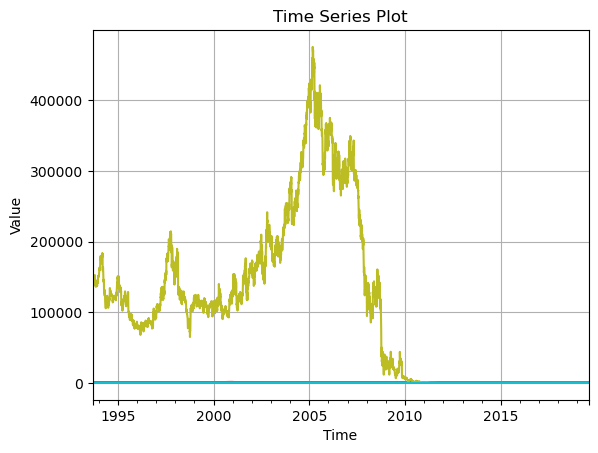

In [14]:
# plotting the time series graph to find anomolies 
plt.figure(figsize=(10, 5))
df_processed.plot.line(legend=False)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Plot')
plt.grid(True)
plt.show()

In [15]:
# from the above , found out that the price for YRCW US Equity is abnormal we drop them. 
df = df_processed.drop(columns=['YRCW US Equity'])    

# rename all the column  
df.columns = df.columns.str.replace(' US Equity', '') 
final_df = df.copy() 

In [67]:
final_df.head()

,AA,AAPL,ABMD,ABT,ADBE,ADI,ADM,ADP,ADSK,AEP,...,WOR,WY,X,XEL,XL,XLNX,XOM,XRAY,XRX,ZION
Date,,,,,,,,,,,,,,,,,,,,,
1993-09-07,13.6285,0.8044,3.750,3.2659,2.3712,2.9608,6.8438,6.1024,5.3525,10.9776,...,9.0117,6.7803,20.5434,6.9696,12.3149,2.5342,8.0198,5.3036,20.5503,7.1675
1993-09-08,13.3718,0.8197,4.375,3.2037,2.4320,2.9025,6.8076,6.0868,5.2949,11.0839,...,9.2388,6.6519,20.3829,6.9696,12.2506,2.4735,8.0815,5.1244,20.5503,6.9766
1993-09-09,13.4652,0.7967,4.375,3.2659,2.3104,3.0046,6.7714,6.0711,5.3093,11.0839,...,9.2388,6.5878,20.4632,6.9326,12.2506,2.5797,8.0044,5.1244,20.3040,6.9554
1993-09-10,13.3952,0.8044,4.125,3.2659,2.3712,3.1067,6.8076,6.1495,5.4388,11.2963,...,9.3524,6.6947,20.7039,7.0065,12.2506,2.7087,8.0969,5.3036,20.4096,7.2099
1993-09-13,13.3251,0.7737,4.250,3.2193,2.3104,3.0046,6.8438,6.1809,5.4964,11.3671,...,9.5418,6.7161,19.3397,7.0435,12.0898,2.6859,8.0661,5.2678,20.2688,7.2523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-25,22.8500,207.0200,272.210,88.0000,308.7300,122.1800,40.6800,167.0600,169.9200,89.0800,...,40.3300,25.0700,15.2800,60.1900,57.5900,127.5900,74.9300,55.8500,34.5400,44.2500
2019-07-26,23.1300,207.7400,272.660,87.7500,311.2700,121.8000,40.5900,169.2700,167.9900,88.9500,...,40.8100,26.2100,15.1900,60.5100,57.5900,120.7700,74.8100,56.0200,34.4300,45.1600
2019-07-29,23.1200,209.6800,275.930,88.5500,307.2200,121.2100,40.9000,167.9100,162.7700,89.7400,...,40.5800,25.8400,15.2700,60.9800,57.5900,120.5500,75.3400,56.3700,33.9400,44.6500


In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6757 entries, 1993-09-07 to 2019-07-31
Columns: 389 entries, AA to ZION
dtypes: float64(389)
memory usage: 20.4 MB


<Figure size 200000x70000 with 0 Axes>

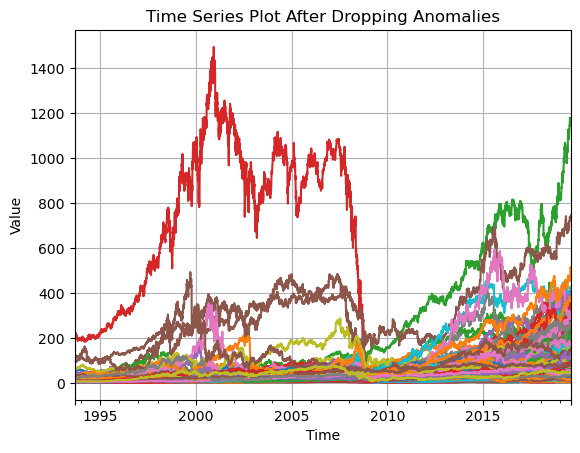

In [66]:
# plotting the time series graph to find anomolies 
plt.figure(figsize=(2000, 700))
final_df.plot.line(legend=False)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Plot After Dropping Anomalies')
plt.grid(True)
plt.show()

# Data Exploratory of Every Stock 

### purpose is to filter the stock 


In [54]:
daily_return = final_df.pct_change().dropna()
annual_mean_return = daily_return.mean() * 252 
annual_variance = daily_return.var() * 252 
annual_volatility = np.sqrt(annual_variance)

# calculate the annual return, variance, sharpe ratio 
annual_return_series = annual_mean_return.reset_index() 
annual_variance_series = annual_variance.reset_index() 
annual_volatility_series = annual_volatility.reset_index()
annual_stats = pd.DataFrame({
    'Company': annual_return_series.iloc[:, 0],  
    'Annual Return': annual_return_series.iloc[:, 1],   
    'Annual Variance': annual_variance_series.iloc[:, 1],
    'Annual Volatility': annual_volatility_series.iloc[:, 1],
    'Sharpe Ratio': (annual_return_series.iloc[:, 1] - 0.02) /np.sqrt(annual_variance_series.iloc[:, 1])
})  

# this will give us the annual stat of each stocks 
annual_stats

,Company,Annual Return,Annual Variance,Annual Volatility,Sharpe Ratio
0,AA,0.097131,0.155294,0.394073,0.195728
1,AAPL,0.304527,0.190155,0.436068,0.652482
2,ABMD,0.383892,0.452053,0.672349,0.541225
3,ABT,0.151939,0.057755,0.240324,0.549007
4,ADBE,0.285797,0.209416,0.457619,0.580826
...,...,...,...,...,...
384,XLNX,0.261209,0.235132,0.484904,0.497437
385,XOM,0.110124,0.053198,0.230647,0.390745
386,XRAY,0.122824,0.068382,0.261500,0.393207
387,XRX,0.102646,0.170349,0.412734,0.200241


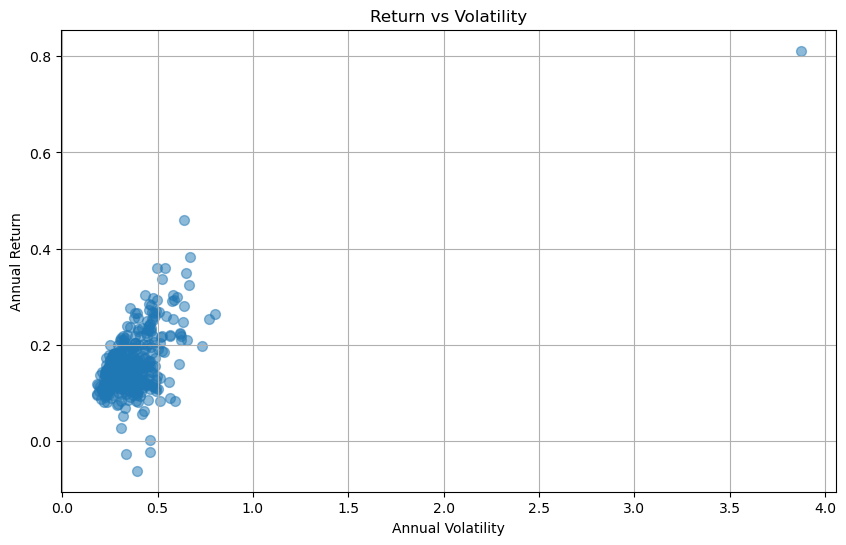

In [64]:
# Plot return vs volatility
from scipy.stats import linregress

plt.figure(figsize=(10, 6))
plt.scatter(annual_stats['Annual Volatility'], annual_stats['Annual Return'], s=50, alpha=0.5)  

# # Fit a regression line
# slope, intercept, _, _, _ = linregress(annual_stats['Annual Variance'], annual_stats['Annual Return'])
# x_values = np.linspace(0, annual_stats['Annual Variance'].max(), 100)
# y_values = slope * x_values + intercept
# plt.plot(x_values, y_values, color='r', linestyle='--', label='Regression Line')


plt.title('Return vs Volatility')
plt.xlabel('Annual Volatility')
plt.ylabel('Annual Return')
plt.grid(True)
plt.show() 


## from the graph we can see that there is a slightly linear relationship, giher return, indicating higher risk 

In [65]:
## since we want the best stock we aim for high sharpe ratio 

sorted_sharpe_ratio = annual_stats.sort_values(by='Sharpe Ratio', ascending=False) 
# company list 
lst_top_20 = sorted_sharpe_ratio.head(20)['Company'].to_list()  

sorted_sharpe_ratio.head(20) 

,Company,Annual Return,Annual Variance,Annual Volatility,Sharpe Ratio
302,ROST,0.277182,0.126826,0.356126,0.722166
100,DHR,0.199284,0.061994,0.248987,0.720054
227,MNST,0.459415,0.406018,0.637196,0.689607
83,COO,0.359802,0.249544,0.499544,0.680224
109,ECL,0.173865,0.051557,0.227061,0.677637
1,AAPL,0.304527,0.190155,0.436068,0.652482
69,CHD,0.179953,0.060352,0.245665,0.651102
264,ORLY,0.239547,0.113837,0.337398,0.650705
199,KSU,0.265949,0.146495,0.382746,0.642590
233,MSFT,0.215370,0.093502,0.305781,0.638921


## Data exploratory for the top 20 stock (sharpe ratio) 


1. ROST: Ross Stores Inc. (Sector: Retail - Apparel & Specialty)
2. DHR: Danaher Corporation (Sector: Healthcare)
3. MNST: Monster Beverage Corporation (Sector: Consumer Goods)
4. COO: The Cooper Companies, Inc. (Sector: Healthcare)
5. ECL: Ecolab Inc. (Sector: Basic Materials)
6. AAPL: Apple Inc. (Sector: Technology)
7. CHD: Church & Dwight Co., Inc. (Sector: Consumer Goods)
8. ORLY: O'Reilly Automotive Inc. (Sector: Services)
9. KSU: Kansas City Southern (Sector: Services)
10. MSFT: Microsoft Corporation (Sector: Technology)
11. BIIB: Biogen Inc. (Sector: Healthcare)
12. SBUX: Starbucks Corporation (Sector: Services)
13. UHS: Universal Health Services, Inc. (Sector: Healthcare)
14. ESRX: Express Scripts Holding Company (Sector: Healthcare)
15. TJX: The TJX Companies, Inc. (Sector: Services)
16. SYK: Stryker Corporation (Sector: Healthcare)
17. BF/B: Brown-Forman Corporation (Sector: Consumer Goods)
18. NKE: NIKE, Inc. (Sector: Consumer Goods)
19. EXPD: Expeditors International of Washington, Inc. (Sector: Services)
20. BLL: Ball Corporation (Sector: Consumer Goods)

In [35]:
top_20_df = final_df[lst_top_20]
top_20_df

,ROST,DHR,MNST,COO,ECL,AAPL,CHD,ORLY,KSU,MSFT,BIIB,SBUX,UHS,ESRX,TJX,SYK,BF/B,NKE,EXPD,BLL
Date,,,,,,,,,,,,,,,,,,,,
1993-09-07,0.3421,1.5658,0.063,0.5491,3.8813,0.8044,1.3839,2.844,0.7081,1.5255,0.768,0.6620,1.8287,0.5742,0.5914,3.0454,1.5589,1.1724,0.7314,1.4540
1993-09-08,0.3421,1.5658,0.060,0.5948,3.8813,0.8197,1.3839,2.844,0.7034,1.5204,0.691,0.6654,1.7855,0.5938,0.5771,2.9010,1.5443,1.1695,0.7186,1.4540
1993-09-09,0.3327,1.5603,0.057,0.5948,3.9374,0.7967,1.3617,2.844,0.6895,1.5561,0.729,0.6790,1.8143,0.6016,0.5943,2.9141,1.5226,1.1924,0.7443,1.4482
1993-09-10,0.3421,1.5714,0.057,0.6406,3.9711,0.8044,1.3987,2.906,0.7011,1.5918,0.768,0.6858,1.7855,0.6250,0.6057,2.9141,1.5540,1.1838,0.7571,1.4655
1993-09-13,0.3421,1.5770,0.057,0.6406,3.9599,0.7737,1.4061,2.844,0.7359,1.5587,0.768,0.6756,1.7855,0.6211,0.6000,2.9272,1.5686,1.1753,0.7443,1.4713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-25,105.5200,143.2100,64.160,337.7000,198.3300,207.0200,74.4800,376.000,123.3200,140.1900,238.210,90.9800,136.9700,92.3300,55.0500,212.6600,54.6400,87.2800,75.4000,71.2900
2019-07-26,106.8300,142.2800,65.200,337.9800,199.6200,207.7400,75.8400,383.790,124.4600,141.3400,238.210,99.1100,151.8900,92.3300,55.7600,214.4500,55.2300,87.5400,76.1900,72.1400
2019-07-29,106.5100,142.6800,65.390,341.4900,200.6200,209.6800,76.1200,389.820,125.0000,141.0300,237.110,98.0200,152.6500,92.3300,55.4400,215.3200,55.2200,87.6200,76.1900,72.2800


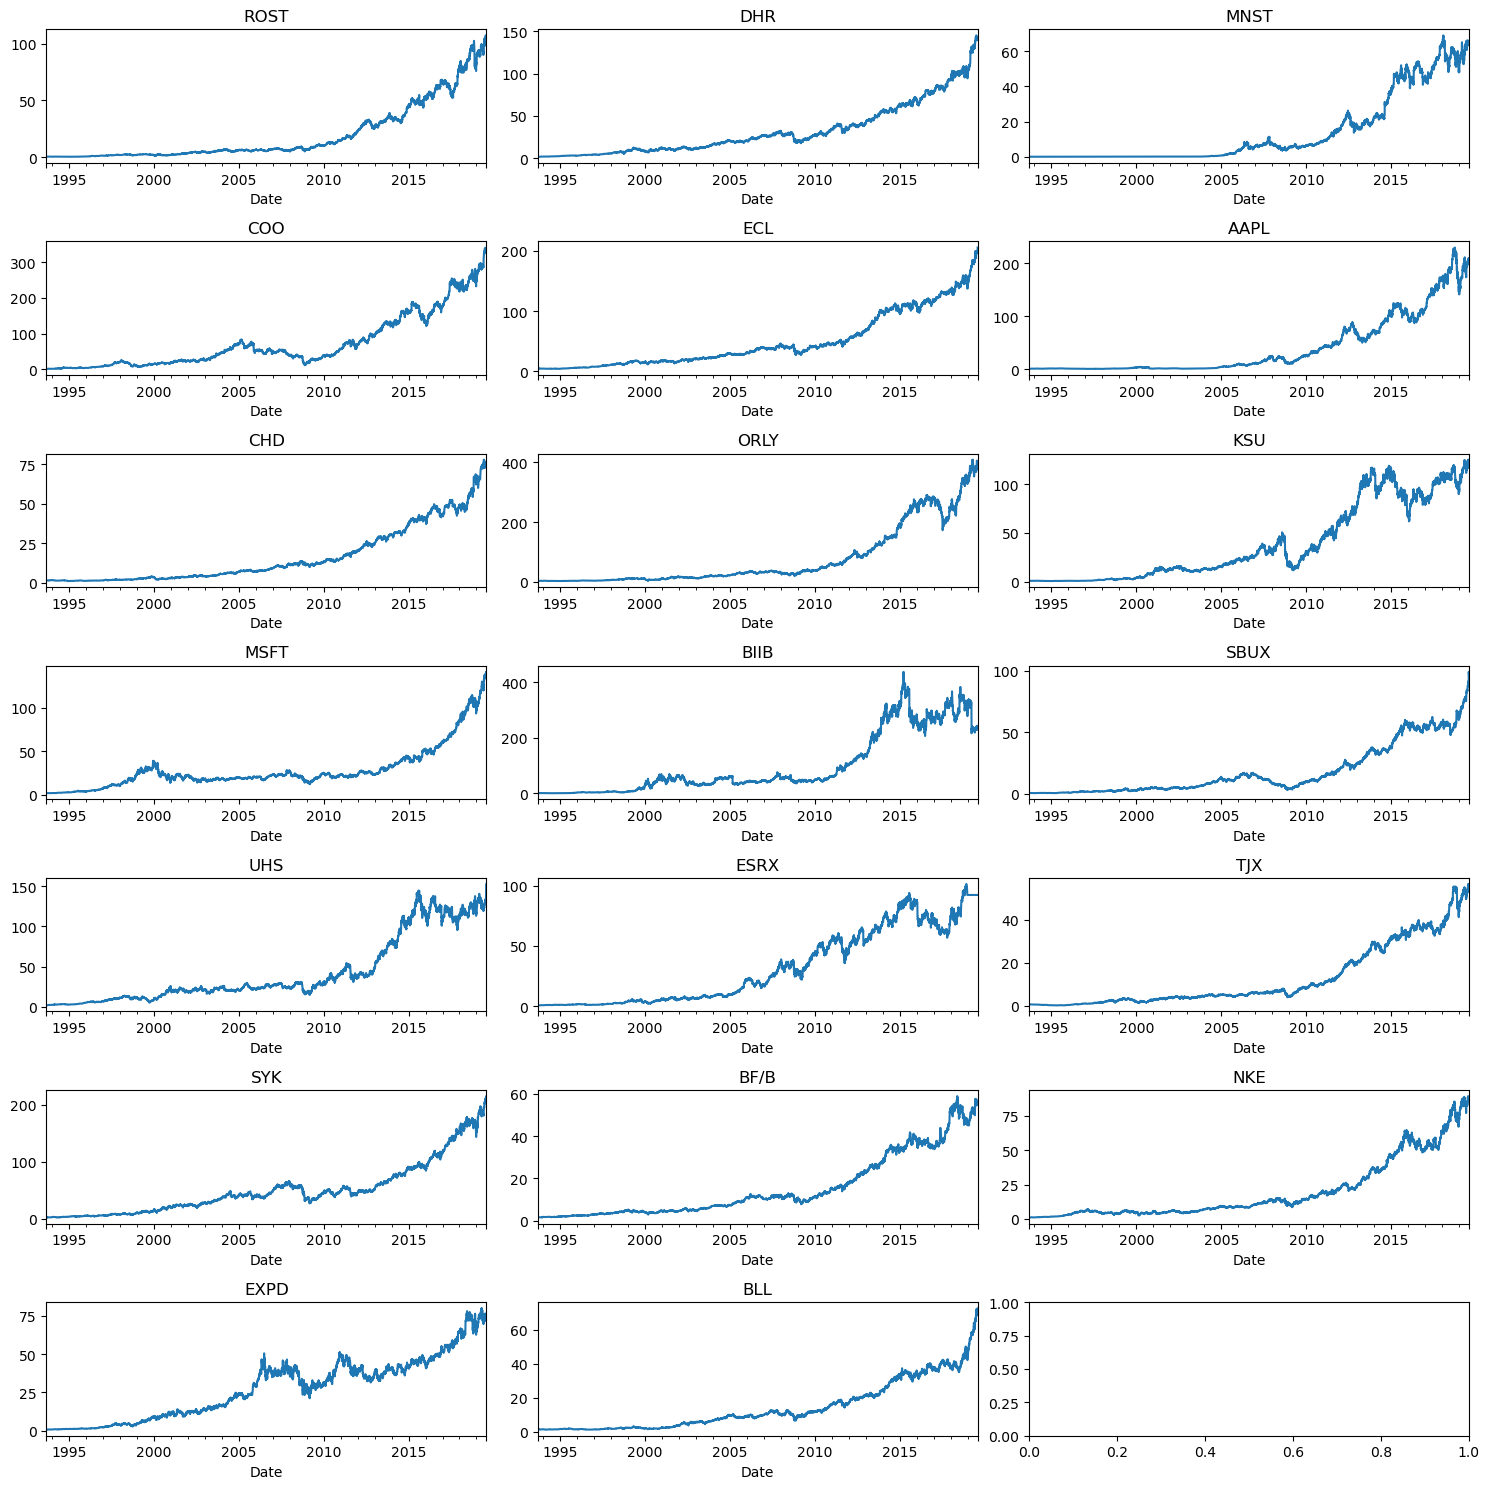

In [42]:
# plotting the stock prices

import matplotlib.pyplot as plt

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each stock in a subplot
for i, company in enumerate(lst_top_20):
    # Plot the stock's data on the corresponding subplot
    final_df[company].plot(ax=axes[i])
    
    # Set title for the subplot
    axes[i].set_title(company)
    
    # Optionally, set other plot properties such as labels, etc.

# Adjust layout to prevent overlap of titles and axes labels
plt.tight_layout()

# Show the plot
plt.show()

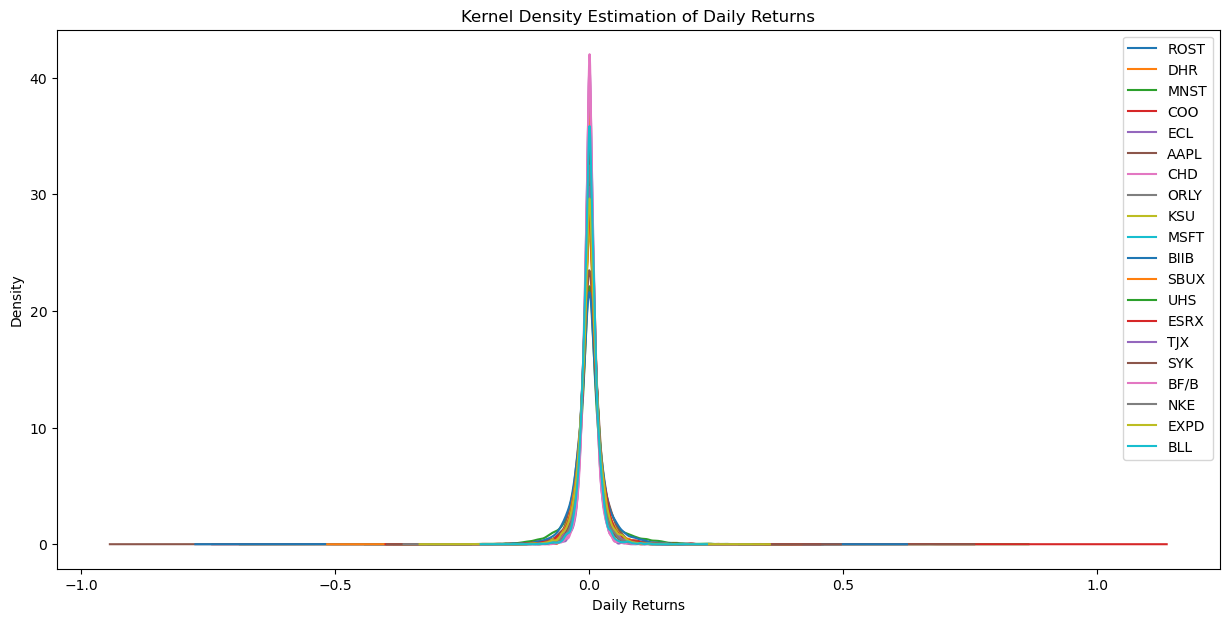

In [51]:
# ignore this 
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 7))

# Plot KDEs for all companies on the same axis
for company in lst_top_20:
    # Plot the stock's data on the same axis
    daily_return[company].plot(kind='kde', ax=ax, label=company)

# Set title and labels
ax.set_title('Kernel Density Estimation of Daily Returns')
ax.set_xlabel('Daily Returns')
ax.set_ylabel('Density')

# Add legend
ax.legend()

# Show the plot
plt.show()

# portfolio we choose the top 10 stock that have the higest sharpe ratio 


- ROST: Ross Stores Inc. (Sector: Retail - Apparel & Specialty)
- DHR: Danaher Corporation (Sector: Healthcare)
- MNST: Monster Beverage Corporation (Sector: Consumer Goods)
- COO: The Cooper Companies, Inc. (Sector: Healthcare)
- ECL: Ecolab Inc. (Sector: Basic Materials)
- AAPL: Apple Inc. (Sector: Technology)
- CHD: Church & Dwight Co., Inc. (Sector: Consumer Goods)
- ORLY: O'Reilly Automotive Inc. (Sector: Services)
- KSU: Kansas City Southern (Sector: Services)
- MSFT: Microsoft Corporation (Sector: Technology)

In [67]:
top_10 = final_df[lst_top_20[:10]] 


,ROST,DHR,MNST,COO,ECL,AAPL,CHD,ORLY,KSU,MSFT
Date,,,,,,,,,,
1993-09-07,0.3421,1.5658,0.063,0.5491,3.8813,0.8044,1.3839,2.844,0.7081,1.5255
1993-09-08,0.3421,1.5658,0.060,0.5948,3.8813,0.8197,1.3839,2.844,0.7034,1.5204
1993-09-09,0.3327,1.5603,0.057,0.5948,3.9374,0.7967,1.3617,2.844,0.6895,1.5561
1993-09-10,0.3421,1.5714,0.057,0.6406,3.9711,0.8044,1.3987,2.906,0.7011,1.5918
1993-09-13,0.3421,1.5770,0.057,0.6406,3.9599,0.7737,1.4061,2.844,0.7359,1.5587
...,...,...,...,...,...,...,...,...,...,...
2019-07-25,105.5200,143.2100,64.160,337.7000,198.3300,207.0200,74.4800,376.000,123.3200,140.1900
2019-07-26,106.8300,142.2800,65.200,337.9800,199.6200,207.7400,75.8400,383.790,124.4600,141.3400
2019-07-29,106.5100,142.6800,65.390,341.4900,200.6200,209.6800,76.1200,389.820,125.0000,141.0300


<AxesSubplot:xlabel='Date'>

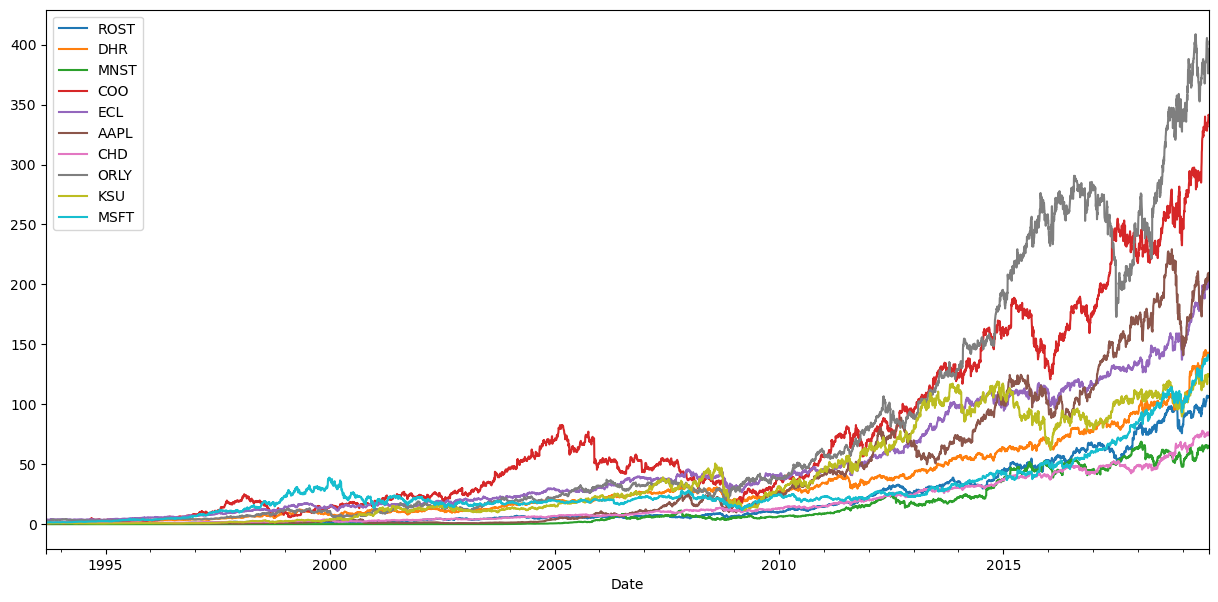

In [71]:
top_10.plot(figsize=(15,7))

### calculate daily return (lognormal return)  

reason of using lognormal return 
1. Additivity: Logarithmic returns have the advantageous property of being additive over time. This means that if you sum the log returns over multiple periods, you get the total return for the entire period. This property simplifies calculations and makes it easier to analyze returns over longer time frames. 

2. Normalization: Log returns can help normalize the distribution of returns, making them closer to a normal distribution. This is useful for many statistical techniques and models that assume normality or require normally distributed data.



In [69]:
log_return = np.log(top_10/ top_10.shift(1)) 
log_return 

# drop the first date (na value) 
log_return = log_return.dropna() 
log_return

,ROST,DHR,MNST,COO,ECL,AAPL,CHD,ORLY,KSU,MSFT
Date,,,,,,,,,,
1993-09-08,0.000000,0.000000,-0.048790,0.079945,0.000000,0.018842,0.000000,0.000000,-0.006660,-0.003349
1993-09-09,-0.027862,-0.003519,-0.051293,0.000000,0.014350,-0.028460,-0.016172,0.000000,-0.019959,0.023209
1993-09-10,0.027862,0.007089,0.000000,0.074180,0.008523,0.009618,0.026809,0.021566,0.016684,0.022683
1993-09-13,0.000000,0.003557,0.000000,0.000000,-0.002824,-0.038912,0.005277,-0.021566,0.048444,-0.021013
1993-09-14,-0.018290,0.000000,0.000000,0.000000,-0.002832,-0.040354,0.010471,0.032518,-0.006270,-0.014866
...,...,...,...,...,...,...,...,...,...,...
2019-07-25,-0.004067,0.003638,-0.008999,0.003203,0.001918,-0.007939,0.006330,-0.053087,0.000730,-0.003773
2019-07-26,0.012338,-0.006515,0.016080,0.000829,0.006483,0.003472,0.018095,0.020506,0.009202,0.008170
2019-07-29,-0.003000,0.002807,0.002910,0.010332,0.004997,0.009295,0.003685,0.015590,0.004329,-0.002196


Text(0, 0.5, 'daily returns')

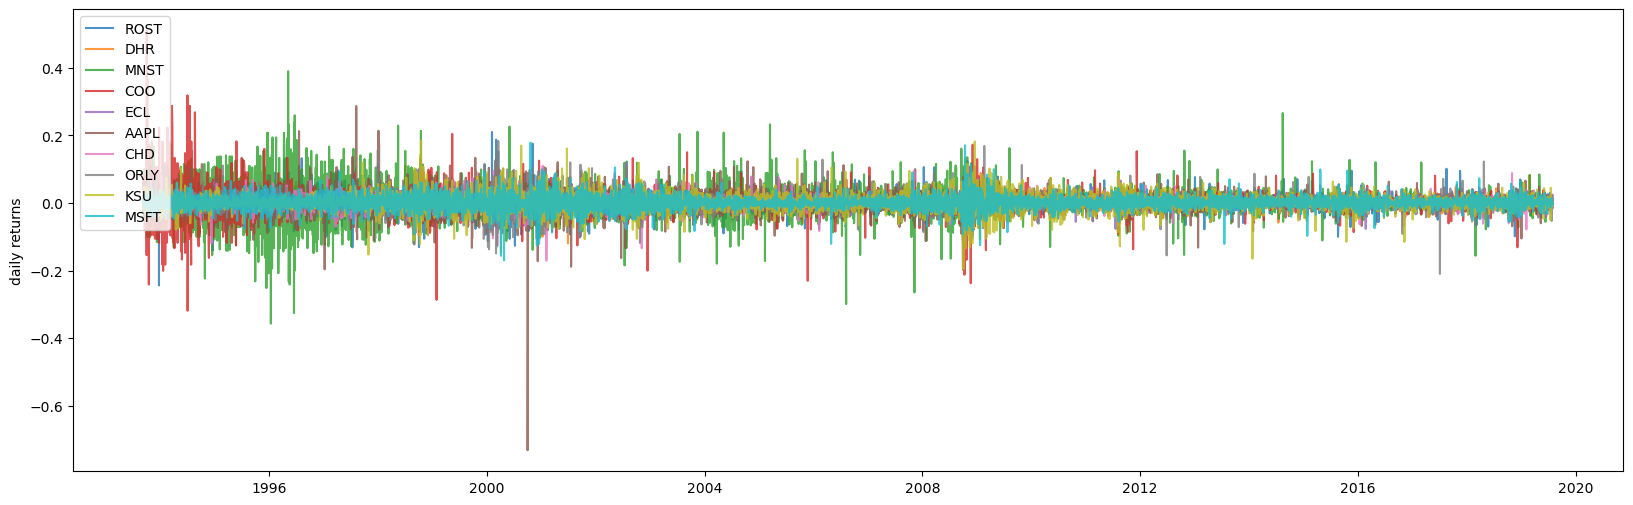

In [70]:
plt.figure(figsize=(20, 6))
for c in log_return.columns.values:
    plt.plot(log_return.index, log_return[c], lw=1.5, alpha=0.8,label=c)
plt.legend(loc='upper left')
plt.ylabel('daily returns')

### calculate the covariance matrix of the stock  
 
this is important because this is how we measure the total risk of the portfolio.  

positive covariance means that when 1 stock increase, the other also increase while negative means that when one stock increases, the other decreases. 

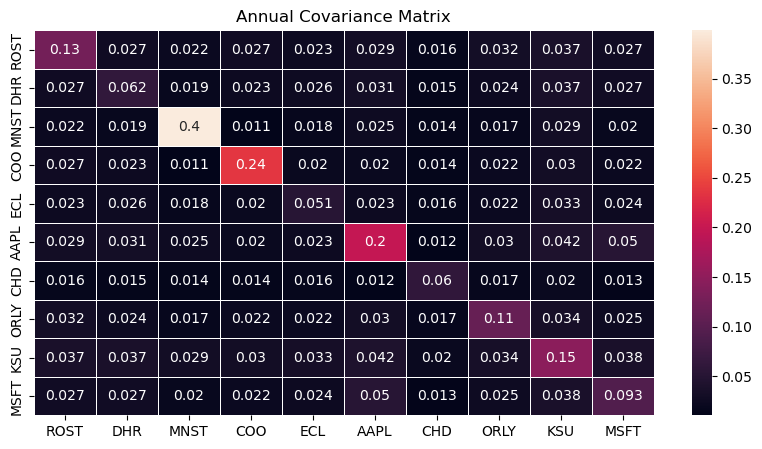

In [72]:
# covariance matrix 
# times 252 because have 252 tradings days and we can calculate the annual 

cov_matrix = log_return.cov()*252 
cov_matrix 

# Plot Covariance matrix
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(cov_matrix, annot=True, linewidths=.5, ax=ax).set_title('Annual Covariance Matrix')
plt.show()

## Portfolio Performance Matrix 

### calculating the standard deviation of the portfolio 

The standard deviation of a portfolio, often referred to as the portfolio volatility or risk, tells us about the variability or dispersion of returns that can be expected from the portfolio. 

1. Risk Measure: The standard deviation of a portfolio is a measure of the uncertainty or risk associated with investing in that portfolio. A higher standard deviation indicates greater variability in returns, which implies higher risk. 

2. Volatility: Portfolio standard deviation is often used as a measure of volatility. Volatility refers to the degree of variation of a trading price series over time. High volatility implies that the price of the security can change dramatically over a short period. 


$$\text{Standard Deviation} = \sqrt{\text{Weights}^T \cdot \text{Covariance Matrix} \cdot \text{Weights}}$$  

Where:
- $ \text{Weights} $ represents the vector of weights for each asset in the portfolio.. 
- $ \text{Covariance Matrix} $ represents the matrix of covariance values between the returns of different assets. 
- $ \cdot $ represents matrix multiplication
- $ \text{Weights}^T $ represents the transpose of the weights vector..

In [123]:
def standard_deviation(weights, cov_matrixs): 
    variance = weights.T @ cov_matrixs @ weights
    return np.sqrt(variance)

### calculate our stock expected return 

the expected return is based on the average historial returns 

The expected return of a stock portfolio can be calculated using the formula:

 $$ E(R_p) = \sum_{i=1}^{N} w_i \cdot E(R_i) $$

Where:
- $ E(R_p) $ represents the expected return of the portfolio.
- $ N $ is the number of stocks in the portfolio.
- $ w_i $ is the weight of the \( i \)-th stock in the portfolio.
- $ E(R_i) $ is the expected return of the \( i \)-th stock.

In [124]:
def expected_return(weights, log_returns):   
    
    # log_returns.mean() will return us the mean of daily return of the particular stocks (10X1 matrix) 
    # since log_return is daily, we times 252 so that return is annual expected return 
    return np.sum(log_returns.mean() * weights) * 252 

### calculate the Sharpe Ratio  

The Sharpe Ratio indicates how much excess return an investment earns per unit of volatility, relative to a risk-free asset. A higher Sharpe Ratio indicates better risk-adjusted performance, as it means the portfolio is generating more return for each unit of risk taken.


$$ \text{Sharpe Ratio} = \frac{{R_p - R_f}}{{\sigma_p}} $$ 

Where:
- $ E(R_p) $ represents the expected return of the portfolio.
- $ E(R_f) $ is the risk-free rate of return. 
- $ \sigma_p $ is the standard deviation (volatility) of the portfolio's returns

In [125]:
def sharpe_ratio(weights, log_returns, cov_matrixs, risk_free_rates): 
    return (expected_return(weights,log_returns) - risk_free_rates) / standard_deviation(weights, cov_matrixs)

### Setting Our Risk-Free Rate

We will be obtaining the risk-free rate from the FRED API. The risk-free rate serves as a benchmark for evaluating the performance of investments and is used as the minimum rate of return investors would expect from an investment with no risk of financial loss.

#### Why Use the 10-Year Treasury Constant Maturity Rate?

The 10-Year Treasury Constant Maturity Rate, obtained from the FRED API using the series identifier "GS10", is commonly used as a proxy for the risk-free rate for several reasons:

1. **Government Backing**: U.S. Treasury securities are backed by the full faith and credit of the U.S. government, making them one of the safest investments available. The 10-Year Treasury Rate represents the yield on U.S. government securities with a fixed 10-year maturity period.

2. **Liquidity and Market Depth**: Treasury securities are highly liquid and actively traded in financial markets. The 10-Year Treasury Rate serves as a benchmark for pricing various financial instruments and is widely used in financial markets.

3. **Availability and Transparency**: Historical data for Treasury rates, including the 10-Year Treasury Rate, is readily available from the FRED database. This data is transparent and widely used in financial analysis and modeling, allowing for consistent comparisons over time.

#### How to Obtain the Risk-Free Rate from FRED API?

We will use the FRED API to retrieve the latest available data for the 10-Year Treasury Constant Maturity Rate (series identifier "GS10"). By fetching this data from FRED, we can obtain the current risk-free rate to use in our financial analysis, investment modeling, and portfolio management.



In [126]:
from fredapi import Fred  
from datetime import datetime, timedelta

fred = Fred(api_key ='3e20fe74acf9fae6b97cb778ef165556') 

# Get the current date
current_date = datetime.today().date()

# Calculate the date 10 years ago
ten_years_ago = current_date - timedelta(days=10*365)


# Get 10-year Treasury rate data for the last 10 years
ten_year_treasury_rate = fred.get_series('GS10', observation_start=ten_years_ago) / 100

# set the risk free rate 
risk_free_rate = ten_year_treasury_rate.iloc[-1] 
print(f"risk_free_rate : {risk_free_rate}")

risk_free_rate : 0.0454


### Define the function to minimize the negative sharpe ratio  


Since we are using the scipy optimisation function, there is no direct maximum optimization so we change our sharpe ratio to a negative number in order to minimize the negative sharpe ratio. 

In [127]:
def neg_sharpe_ratio(weights, log_returns, cov_matrixs, risk_free_rates): 
    return -sharpe_ratio(weights, log_returns, cov_matrixs, risk_free_rates)

### setting the constraints and bounds 

For our optimisation technique, our constraint is that the sum of all the portfolio weight must be equal to 1. 

The bound are the limits place on the variable during the optimazation process. In our case, our variable are the portfolio weight.

In [128]:
# 'eq' means equally constraints, which means that our weight must be 1 
constraint = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}  

# we are setting the boundary for each of the weight for stock
# Setting the lower bound to 0 ensures we don't short-sell any stocks. 
# The upper bound of 0.5 prevents any single stock from dominating the portfolio, keeping our investments diversified
bounds = [(0,0.5) for _ in range(10)] 


initial_weights = np.array([1/len(top_10.columns)]*len(top_10.columns)) 


## Now we will optimise the weight to return the maximum sharpe ratio  



- We will be using scipy minimize to optimize the weight for the highest sharpe ratio   
- we will be using the 'SLSQP' method which is the Sequantial Least Sequence Quadratic Programming method which is a numerical optimization technique for solving non linear optimization problem with constraints. 

In [129]:
def optimization(log_return, risk_free_rate): 
    cov_matrix = log_return.cov() * 252  
    constraint = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}  
    bounds = [(0,0.5) for _ in range(log_return.shape[1])] 
    initial_weights = np.array([1/log_return.shape[1]]*log_return.shape[1])  
    optimize_method = minimize(neg_sharpe_ratio, initial_weights, args =(log_return,cov_matrix,risk_free_rate), method ='SLSQP', constraints=constraint, bounds=bounds) 
    return optimize_method.x 

In [142]:
log_return = np.log(top_10/ top_10.shift(1)) 
log_return = log_return.dropna() 
log_return

optimal_weight = optimization(log_return,risk_free_rate)
print(optimal_weight) 
print(np.sum(optimal_weight))

[0.14260657 0.13826258 0.08231612 0.11596877 0.07964995 0.07005385
 0.2016262  0.09343562 0.01896244 0.0571179 ]
1.0


In [133]:
print("Optimal weights:") 
for ticker, weight in zip(top_10.columns,optimal_weight): 
    print(f"{ticker}: {weight:.4f}") 
print() 

optimal_portfolio_return = expected_return(optimal_weight,log_return) 
optimal_portfolio_volatility = standard_deviation(optimal_weight, cov_matrix)  
optimal_sharpe_ratio = sharpe_ratio(optimal_weight, log_return, cov_matrix, risk_free_rate) 

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}") 
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}") 
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal weights:
ROST: 0.1426
DHR: 0.1383
MNST: 0.0823
COO: 0.1160
ECL: 0.0796
AAPL: 0.0701
CHD: 0.2016
ORLY: 0.0934
KSU: 0.0190
MSFT: 0.0571

Expected Annual Return: 0.1898
Expected Volatility: 0.1674
Sharpe Ratio: 0.8630


In [134]:
print("Equally weights:") 
for ticker, weight in zip(top_10.columns,initial_weights): 
    print(f"{ticker}: {weight:.4f}") 
print() 

optimal_portfolio_return = expected_return(initial_weights,log_return) 
optimal_portfolio_volatility = standard_deviation(initial_weights, cov_matrix)  
optimal_sharpe_ratio = sharpe_ratio(initial_weights, log_return, cov_matrix, risk_free_rate) 

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}") 
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}") 
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Equally weights:
ROST: 0.1000
DHR: 0.1000
MNST: 0.1000
COO: 0.1000
ECL: 0.1000
AAPL: 0.1000
CHD: 0.1000
ORLY: 0.1000
KSU: 0.1000
MSFT: 0.1000

Expected Annual Return: 0.1931
Expected Volatility: 0.1727
Sharpe Ratio: 0.8552


# Testing using our optimisation strategies on unseen data (out of sample)  

we will split our data into interval of 5 year window to calculate the optimal weight and test it on the next following years


In [135]:
def split_data(df, window_size=5):
    start_year = df.index.min().year
    end_year = df.index.max().year
    train_data = []
    test_data = []

    for year in range(start_year, end_year - window_size):
        train_subset = df.loc[str(year):str(year + window_size - 1)]
        test_subset = df.loc[str(year + window_size):str(year + window_size)]

        train_data.append(train_subset)
        if not test_subset.empty:
            test_data.append(test_subset)

    return train_data, test_data

In [170]:
df_split = top_10.copy()
train_data,test_data = split_data(df_split)  
train_data[10]

,ROST,DHR,MNST,COO,ECL,AAPL,CHD,ORLY,KSU,MSFT
Date,,,,,,,,,,
2003-01-01,4.5554,11.8869,0.088,24.6429,20.5401,0.9040,4.1690,12.645,11.0572,16.8817
2003-01-02,4.6457,12.2125,0.089,25.2930,20.7684,0.9336,4.1854,12.770,11.4258,17.5413
2003-01-03,4.6049,12.1926,0.090,25.6081,20.7061,0.9399,4.1882,12.420,11.3797,17.5641
2003-01-06,4.6198,12.2994,0.090,26.1006,21.1169,0.9399,4.2539,12.735,11.6100,17.8841
2003-01-07,4.7252,12.0081,0.090,26.4453,21.3203,0.9368,4.2032,12.565,11.6100,18.2205
...,...,...,...,...,...,...,...,...,...,...
2007-12-25,5.8146,32.2602,8.043,36.6669,45.7890,25.0821,11.8547,32.370,32.4528,28.0310
2007-12-26,5.6939,32.2529,7.898,37.1129,45.7452,25.1011,11.8291,32.320,31.9368,28.0540
2007-12-27,5.6381,31.9252,7.532,36.9840,45.7277,25.0531,11.6670,32.200,31.4669,27.5636


In [137]:
## training to get optimal weight 

optimal_weights_list = [] 

for train_subset in train_data: 
    train_log_returns = np.log(train_subset/ train_subset.shift(1)).dropna() 
    risk_free_rate = risk_free_rate 
    optimal_weight = optimization(train_log_returns,risk_free_rate) 
    optimal_weights_list.append(optimal_weight) 


In [138]:
# Initialize lists to store results
portfolio_returns = []
portfolio_volatilities = []
portfolio_sharpe_ratios = []

# Iterate through optimized weights and calculate metrics for each interval for the last interval the testing set is empty 
for i, optimal_weight in enumerate(optimal_weights_list):
    # Extract the corresponding test subset
    test_subset = test_data[i]
    
    # Calculate log returns of the test subset
    test_log_return = np.log(test_subset / test_subset.shift(1)).dropna()
    
    # Calculate covariance matrix for the test subset
    cov_matrix = test_log_return.cov() * 252  
    
    # Calculate portfolio return using optimized weights
    portfolio_return = expected_return(optimal_weight, test_log_return)
    portfolio_returns.append(portfolio_return)

    # Calculate portfolio volatility using optimized weights and covariance matrix
    portfolio_volatility = standard_deviation(optimal_weight, cov_matrix)
    portfolio_volatilities.append(portfolio_volatility)

    # Calculate Sharpe ratio using portfolio return, volatility, and risk-free rate
    portfolio_sharpe_ratio = sharpe_ratio(optimal_weight, test_log_return, cov_matrix, risk_free_rate)
    portfolio_sharpe_ratios.append(portfolio_sharpe_ratio)

    # Print results for each interval
    print(f"Testing Interval {i+1}:")
    print(f"Expected Annual Return: {portfolio_return:.4f}")
    print(f"Expected Volatility: {portfolio_volatility:.4f}")
    print(f"Sharpe Ratio: {portfolio_sharpe_ratio:.4f}")
    print()

Testing Interval 1:
Expected Annual Return: 0.4171
Expected Volatility: 0.2530
Sharpe Ratio: 1.4690

Testing Interval 2:
Expected Annual Return: 0.1536
Expected Volatility: 0.2050
Sharpe Ratio: 0.5279

Testing Interval 3:
Expected Annual Return: -0.1763
Expected Volatility: 0.2731
Sharpe Ratio: -0.8119

Testing Interval 4:
Expected Annual Return: 0.1368
Expected Volatility: 0.2452
Sharpe Ratio: 0.3729

Testing Interval 5:
Expected Annual Return: -0.0878
Expected Volatility: 0.2689
Sharpe Ratio: -0.4955

Testing Interval 6:
Expected Annual Return: 0.2771
Expected Volatility: 0.2078
Sharpe Ratio: 1.1152

Testing Interval 7:
Expected Annual Return: 0.3033
Expected Volatility: 0.1682
Sharpe Ratio: 1.5328

Testing Interval 8:
Expected Annual Return: 0.2915
Expected Volatility: 0.2357
Sharpe Ratio: 1.0445

Testing Interval 9:
Expected Annual Return: 0.2524
Expected Volatility: 0.2774
Sharpe Ratio: 0.7462

Testing Interval 10:
Expected Annual Return: 0.3714
Expected Volatility: 0.2298
Sharpe 

In [139]:
equally_weight = [np.array([1/len(top_10.columns)]*len(top_10.columns)) for _ in range(21)]
# Initialise lists to store results
eq_portfolio_returns = []
eq_portfolio_volatilities = []
eq_portfolio_sharpe_ratios = []

# Iterate through optimised weights and calculate metrics for each interval for the last interval the testing set is empty 
for i, equally_weight in enumerate(equally_weight):
    # Extract the corresponding test subset
    test_subset = test_data[i]
    
    # Calculate log returns of the test subset
    test_log_return = np.log(test_subset / test_subset.shift(1)).dropna()
    
    # Calculate covariance matrix for the test subset
    cov_matrix = test_log_return.cov() * 252  
    
    # Calculate portfolio return using optimised weights
    portfolio_return = expected_return(equally_weight, test_log_return)
    eq_portfolio_returns.append(portfolio_return)

    # Calculate portfolio volatility using optimised weights and covariance matrix
    portfolio_volatility = standard_deviation(equally_weight, cov_matrix)
    eq_portfolio_volatilities.append(portfolio_volatility)

    # Calculate Sharpe ratio using portfolio return, volatility, and risk-free rate
    portfolio_sharpe_ratio = sharpe_ratio(equally_weight, test_log_return, cov_matrix, risk_free_rate)
    eq_portfolio_sharpe_ratios.append(portfolio_sharpe_ratio)

    # Print results for each interval
    print(f"Testing Interval {i+1}:")
    print(f"Expected Annual Return: {portfolio_return:.4f}")
    print(f"Expected Volatility: {portfolio_volatility:.4f}")
    print(f"Sharpe Ratio: {portfolio_sharpe_ratio:.4f}")
    print()

Testing Interval 1:
Expected Annual Return: 0.4364
Expected Volatility: 0.2624
Sharpe Ratio: 1.4899

Testing Interval 2:
Expected Annual Return: 0.2150
Expected Volatility: 0.1850
Sharpe Ratio: 0.9168

Testing Interval 3:
Expected Annual Return: -0.0676
Expected Volatility: 0.2510
Sharpe Ratio: -0.4503

Testing Interval 4:
Expected Annual Return: 0.2349
Expected Volatility: 0.2332
Sharpe Ratio: 0.8125

Testing Interval 5:
Expected Annual Return: -0.0452
Expected Volatility: 0.2318
Sharpe Ratio: -0.3907

Testing Interval 6:
Expected Annual Return: 0.3231
Expected Volatility: 0.1711
Sharpe Ratio: 1.6229

Testing Interval 7:
Expected Annual Return: 0.4113
Expected Volatility: 0.1521
Sharpe Ratio: 2.4065

Testing Interval 8:
Expected Annual Return: 0.2680
Expected Volatility: 0.1596
Sharpe Ratio: 1.3945

Testing Interval 9:
Expected Annual Return: 0.1613
Expected Volatility: 0.1518
Sharpe Ratio: 0.7636

Testing Interval 10:
Expected Annual Return: 0.1726
Expected Volatility: 0.1685
Sharpe 

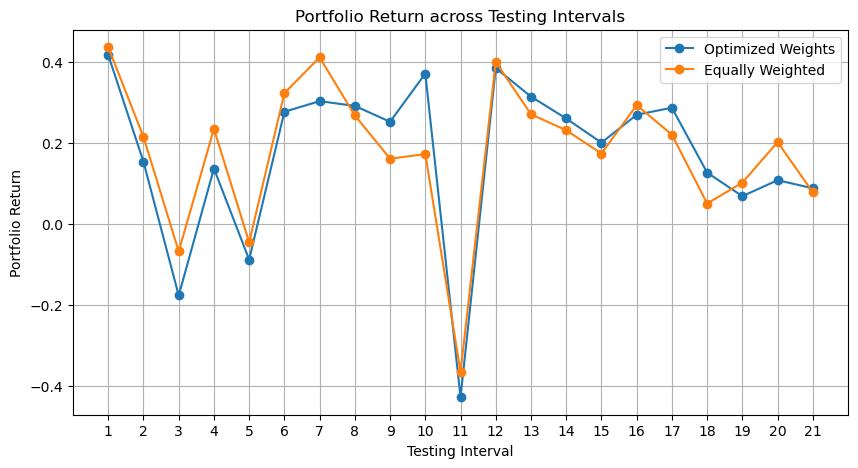

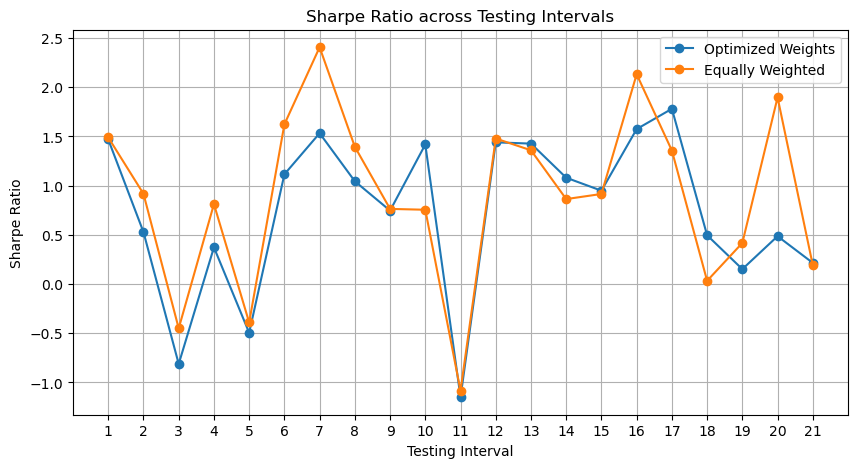

In [110]:
import matplotlib.pyplot as plt

# Plot portfolio returns
plt.figure(figsize=(10, 5))

# Plot optimised weights
plt.plot(range(1, len(portfolio_returns)+1), portfolio_returns, marker='o', linestyle='-', label='Optimized Weights')

# Plot equally weighted
plt.plot(range(1, len(eq_portfolio_returns)+1), eq_portfolio_returns, marker='o', linestyle='-', label='Equally Weighted')

plt.xlabel('Testing Interval')
plt.ylabel('Portfolio Return')
plt.title('Portfolio Return across Testing Intervals')
plt.xticks(range(1, len(portfolio_returns)+1))
plt.grid(True)
plt.legend()
plt.show()

# Plot Sharpe ratios
plt.figure(figsize=(10, 5))

# Plot optimised weights
plt.plot(range(1, len(portfolio_sharpe_ratios)+1), portfolio_sharpe_ratios, marker='o', linestyle='-', label='Optimized Weights')

# Plot equally weighted
plt.plot(range(1, len(eq_portfolio_sharpe_ratios)+1), eq_portfolio_sharpe_ratios, marker='o', linestyle='-', label='Equally Weighted')

plt.xlabel('Testing Interval')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratio across Testing Intervals')
plt.xticks(range(1, len(portfolio_sharpe_ratios)+1))
plt.grid(True)
plt.legend()
plt.show()

In [111]:
print(f"portfolio_returns: {np.array(portfolio_returns).mean()}") 
print(f"portfolio_volatilities: {np.array(portfolio_volatilities).mean()}")
print(f"portfolio_sharpe_ratios: {np.array(portfolio_sharpe_ratios).mean()}")

print()
print(f"eq_portfolio_returns: {np.array(eq_portfolio_returns).mean()}") 
print(f"eq_portfolio_volatilities: {np.array(eq_portfolio_volatilities).mean()}")
print(f"eq_portfolio_sharpe_ratios: {np.array(eq_portfolio_sharpe_ratios).mean()}")

portfolio_returns: 0.17245017782664684
portfolio_volatilities: 0.21373389709880639
portfolio_sharpe_ratios: 0.7318341348720117

eq_portfolio_returns: 0.17943683962630508
eq_portfolio_volatilities: 0.18574237739435157
eq_portfolio_sharpe_ratios: 0.8989929669907245


# different optimisation method Efficient frontier 

In [112]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco 

In [156]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

In [157]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(10)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [158]:
import matplotlib.pyplot as plt

def display_simulated_ef_with_random_2(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0, max_sharpe_idx], results[1, max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx], index=top_10.columns, columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i * 100, 2) for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0, min_vol_idx], results[1, min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx], index=top_10.columns, columns=['allocation'])
    min_vol_allocation.allocation = [round(i * 100, 2) for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-" * 80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp, 4))
    print("Annualised Volatility:", round(sdp, 4))
    print("\n") 
    print(max_sharpe_allocation)
    
    print("-" * 80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min, 4))
    print("Annualised Volatility:", round(sdp_min, 4))
    print("\n") 
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='YlGnBu', marker='o', s=20, alpha=0.6)  # Adjusted marker size and transparency
    plt.colorbar()
    plt.scatter(sdp, rp, marker='*', color='r', s=200, label='Maximum Sharpe ratio')  # Adjusted marker size
    plt.scatter(sdp_min, rp_min, marker='*', color='g', s=200, label='Minimum volatility')  # Adjusted marker size
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('Annualised Volatility')
    plt.ylabel('Annualised Returns')
    plt.legend(labelspacing=0.8)
    plt.grid(True)  # Added gridlines
    
    plt.show()

In [159]:
returns = log_return
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0178

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.1883
Annualised Volatility: 0.1816


             ROST    DHR  MNST    COO    ECL  AAPL    CHD   ORLY   KSU  MSFT
allocation  11.22  14.06  7.74  12.33  13.38  6.14  14.99  11.56  1.75  6.83
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.1714
Annualised Volatility: 0.1714


            ROST    DHR  MNST   COO    ECL  AAPL   CHD  ORLY  KSU  MSFT
allocation  8.33  18.89  1.57  4.87  22.01  4.96  27.2  3.77  5.6  2.78


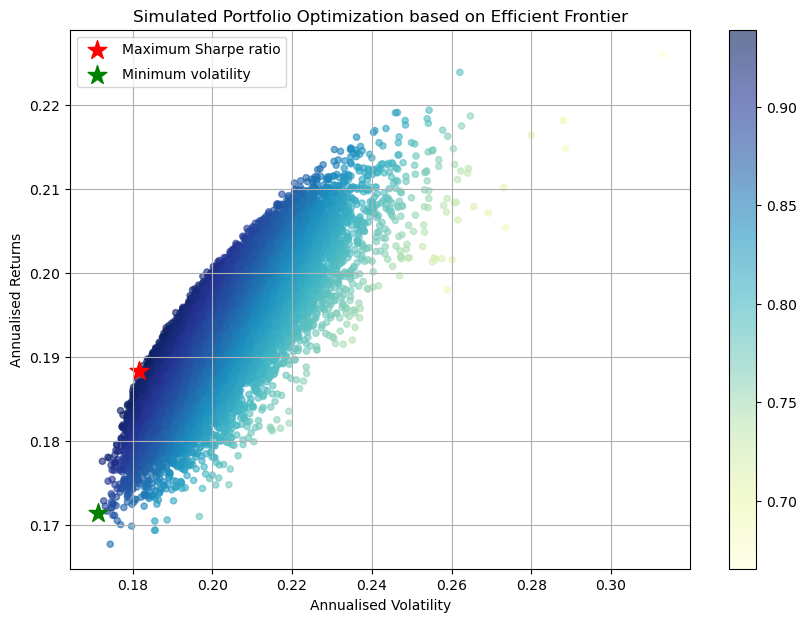

In [161]:
display_simulated_ef_with_random_2(mean_returns, cov_matrix, num_portfolios, risk_free_rate)